# Image Matching Challenge - EDA

In [237]:
import pandas as pd
import numpy as np
import os
import random
import seaborn as sns
import matplotlib.pylab as plt
import cv2

# Setting image directory. Every Building has to have its own folder and a subfolder 'images'
datadir = '../data/train/'

In [2]:
# Generates a list of all building folder names
buildings = next(os.walk(datadir))[1]
buildings.sort()
buildings

['brandenburg_gate',
 'british_museum',
 'buckingham_palace',
 'colosseum_exterior',
 'grand_place_brussels',
 'lincoln_memorial_statue',
 'notre_dame_front_facade',
 'pantheon_exterior',
 'piazza_san_marco',
 'sacre_coeur',
 'sagrada_familia',
 'st_pauls_cathedral',
 'st_peters_square',
 'taj_mahal',
 'temple_nara_japan',
 'trevi_fountain']

## Number of Images

In [5]:
df = pd.DataFrame()
df['building'] = buildings

len_list = []

for building in df['building']:
    path = os.path.join(datadir,building,'images') 
    len_list.append(len(os.listdir(path)))
    
df['no_images'] = len_list

df

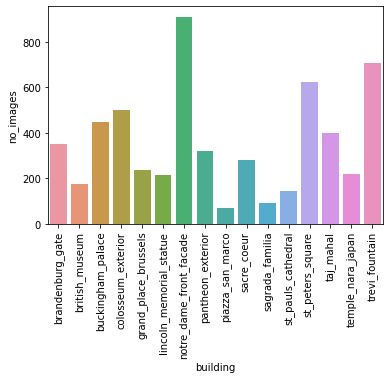

In [7]:
sns.barplot(x = df.building, y = df.no_images)
plt.xticks(rotation = 90);

## Image sizes

In [60]:
building_list = []
imageid_list= []
height_list = []
width_list = []

for building in df['building']:
    path = os.path.join(datadir,building,'images') 
    for image in next(os.walk(path))[2]:
        imgpath = os.path.join(path,image) 
        img = cv2.imread(imgpath, cv2.IMREAD_UNCHANGED)
        building_list.append(building)
        imageid_list.append(image)
        height_list.append(img.shape[0])
        width_list.append(img.shape[1])

In [71]:
df_sizes = pd.DataFrame(columns = ['image_id', 'building', 'width', 'height'])

df_sizes.building, df_sizes.image_id, df_sizes.width, df_sizes.height = building_list, imageid_list, width_list, height_list

In [72]:
df_sizes.head()

,image_id,building,width,height
0,17956239_927188867.jpg,brandenburg_gate,1028,769
1,10624116_2746543073.jpg,brandenburg_gate,1001,751
2,03890690_2728701915.jpg,brandenburg_gate,1023,767
3,18348543_5140101294.jpg,brandenburg_gate,1031,687
4,50607370_12607638855.jpg,brandenburg_gate,779,1052


In [73]:
df_sizes.describe()

,width,height
count,5678.000000,5678.000000
mean,933.224727,786.890983
std,176.213144,166.595722
min,113.000000,103.000000
25%,780.000000,689.000000
50%,1028.000000,772.000000
75%,1050.000000,813.750000
max,1229.000000,1131.000000


<AxesSubplot:xlabel='width', ylabel='height'>

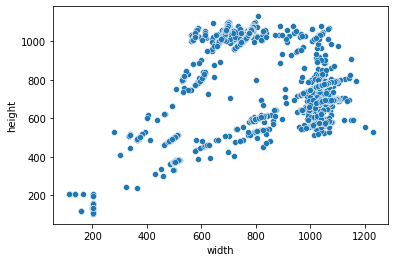

In [74]:
sns.scatterplot(x = df_sizes.width, y = df_sizes.height)

## Image Samples

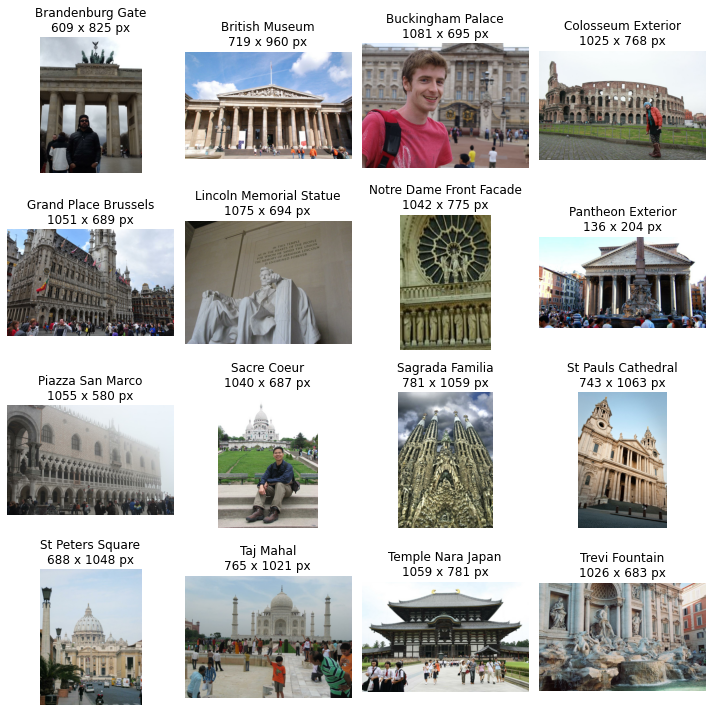

In [236]:
# specifying the overall grid size
plt.figure(figsize=(10,10)) 

# specifying subplot grid
nrows = 4
ncols = 4

for i, building in enumerate(df['building']):
    sp = plt.subplot(nrows, ncols, i+1)
    sp.axis('off')
    sp.set_title(building.title().replace("_", " ") + "\n" + str(img.shape[1]) + ' x ' + str(img.shape[0]) + ' px')
    path = os.path.join(datadir,building,'images') 
    files = os.listdir(path)
    rand_image = random.choice(files)
    imgpath = os.path.join(path,rand_image) 
    img = cv2.imread(imgpath)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    sp.set_xlabel(str(img.shape[1]) + ' x ' + str(img.shape[0]) + ' px')
    plt.imshow(img)
plt.tight_layout()

## Covisibility